In [1]:
import pandas as pd
import numpy as np
import gc
import random
from autogluon.tabular import TabularDataset, TabularPredictor

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
DATA_DIR = "data/"
PREDICTOR_DIR = "predictors/"

In [4]:
df_val = pd.read_csv(DATA_DIR + "Large_Non_Laundering_27M.csv")

In [5]:
df_large_fraud = pd.read_csv(DATA_DIR + "Large_Is_Laundering.csv")

In [7]:
df_val = pd.concat([df_val, df_large_fraud], ignore_index=True)

In [9]:
y_true = df_val["Is Laundering"]
df_val.drop(columns=["Is Laundering"], inplace=True)

In [ ]:
it1 = {
    "predictor": PREDICTOR_DIR + "1",
    "models_to_validate": ["LightGBM", "NeuralNetTorch", "XGBoost"]
}

In [10]:
it2_1 = {
    "predictor": PREDICTOR_DIR + "2_10000",
    "models_to_validate": ["LightGBMXT_BAG_L1/T1", "LightGBMXT_BAG_L1/T2", "RandomForestGini_BAG_L1"]
}

In [ ]:
it2_2 = {
    "predictor": PREDICTOR_DIR + "2_250000",
    "models_to_validate": ["LightGBM_BAG_L1/T3", "XGBoost_BAG_L1/T1", "WeightedEnsemble_L2"]
}

In [11]:
it3 = {
    "predictor": PREDICTOR_DIR + "3",
    "models_to_validate": ["KNeighborsDist_BAG_L1", "LightGBMXT_BAG_L1/T1", "WeightedEnsemble_L2"]
}

In [9]:
it5 = {
    "predictor": PREDICTOR_DIR + "4",
    "models_to_validate": ["NeuralNetFastAI_BAG_L1/040ac038", "RandomForestGini_BAG_L1", "RandomForestEntr_BAG_L1"]
}

In [11]:
def generate_predictions(it):
    predictor = TabularPredictor.load(it["predictor"])
    preds = pd.DataFrame()
    for model in it["models_to_validate"]:
        print(f'Current model: {model}')
        preds[model] = predictor.predict(df_val, model=model)
    return preds

In [12]:
def print_confusion_matrices(preds):
    for model_name, y_pred in preds.items():
        display = ConfusionMatrixDisplay.from_predictions(y_true.tolist(), y_pred.tolist())
        display.ax_.set_title(model_name)
        display.plot(cmap="Blues", values_format='') #
        plt.show()

In [13]:
%%time
preds2_1 = generate_predictions(it2_1)

Current model: LightGBMXT_BAG_L1/T1
Current model: LightGBMXT_BAG_L1/T2
Current model: RandomForestGini_BAG_L1
CPU times: user 5h 18min 5s, sys: 3min 31s, total: 5h 21min 37s
Wall time: 52min 33s


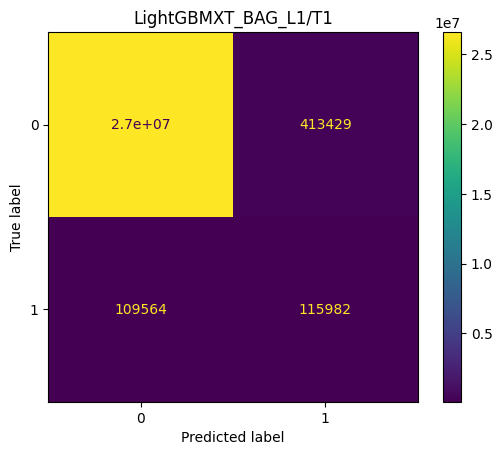

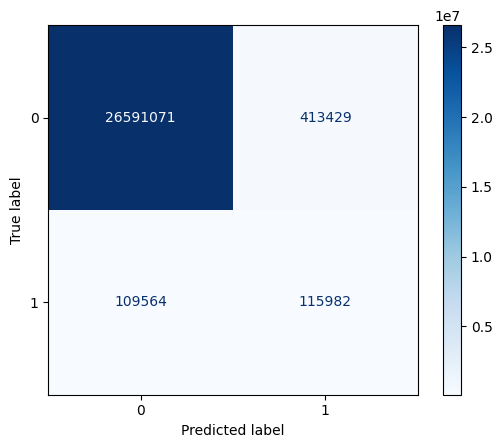

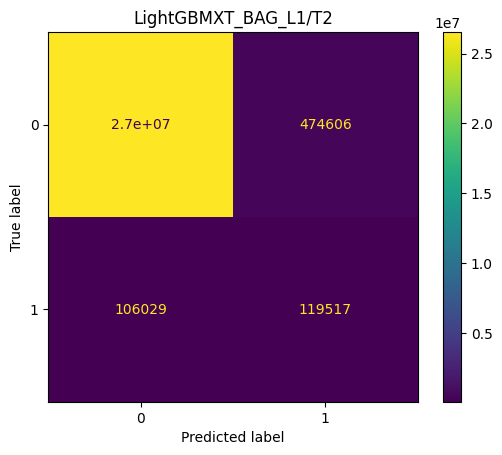

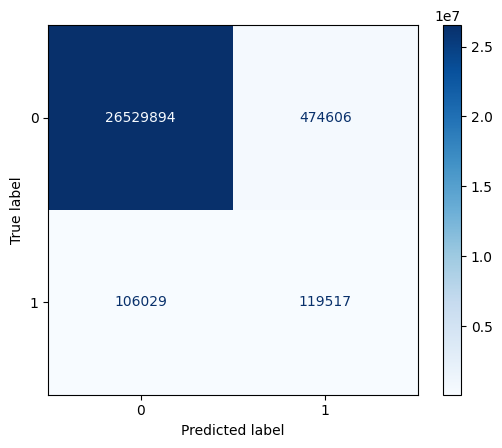

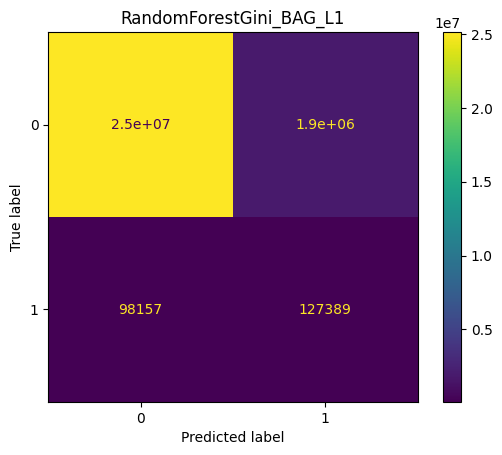

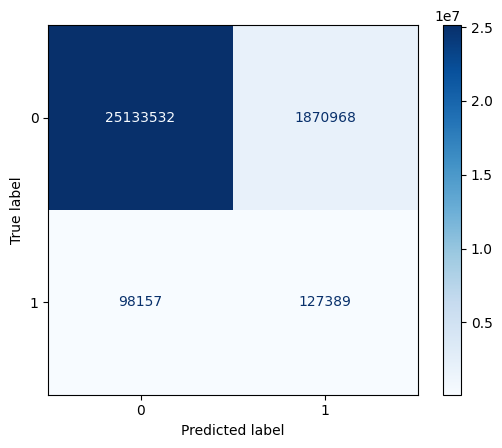

In [14]:
print_confusion_matrices(preds2_1)

In [11]:
preds2 = generate_predictions(it2_2)

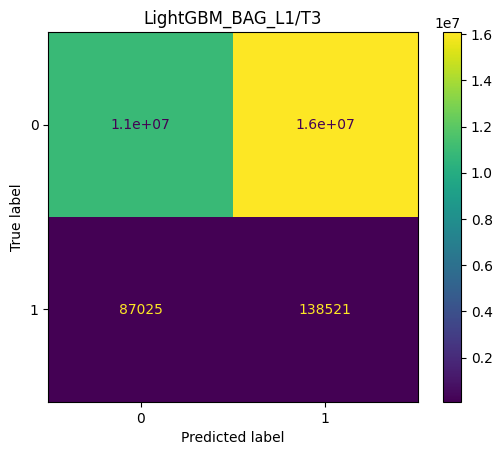

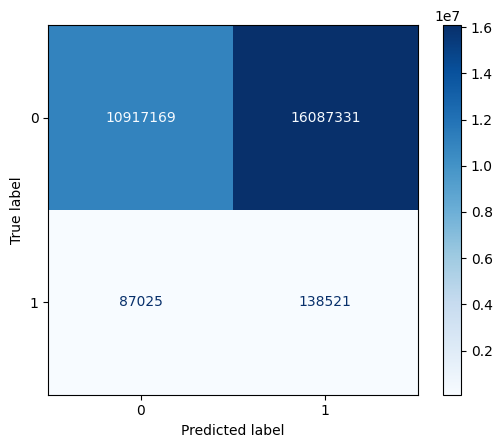

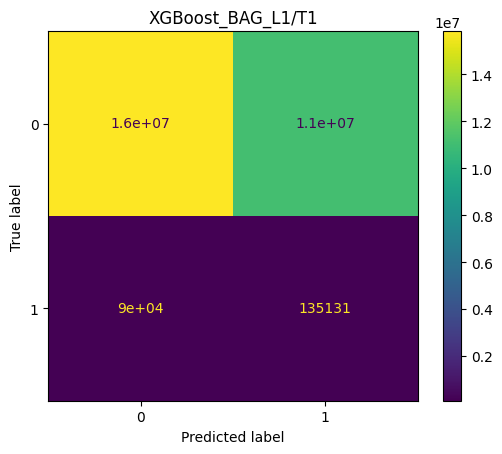

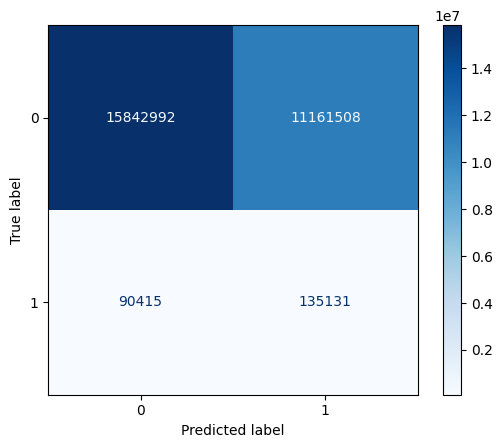

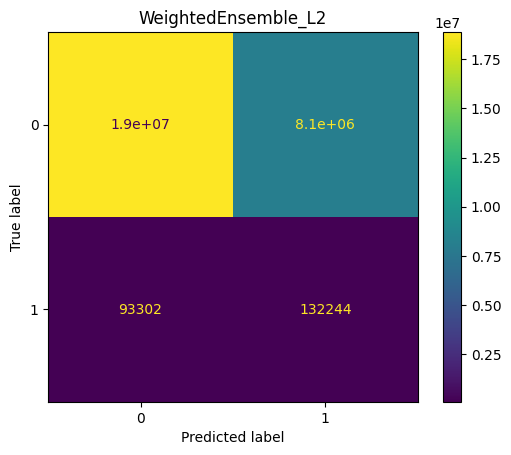

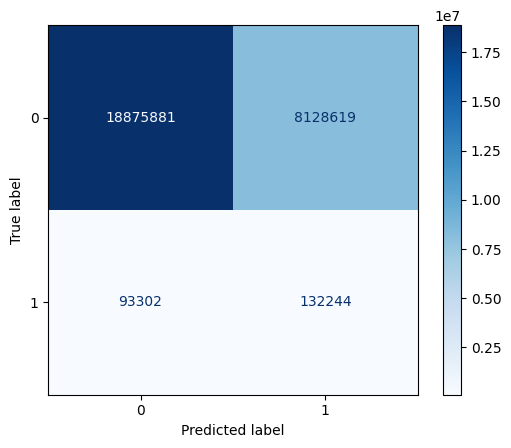

In [14]:
print_confusion_matrices(preds2)

In [12]:
%%time
preds3 = generate_predictions(it3)

Current model: KNeighborsDist_BAG_L1
Current model: LightGBMXT_BAG_L1/T1
Current model: WeightedEnsemble_L2
CPU times: user 2h 12min 58s, sys: 1min 42s, total: 2h 14min 41s
Wall time: 25min 55s


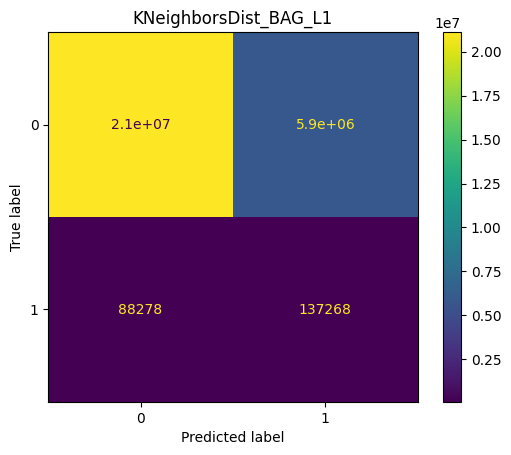

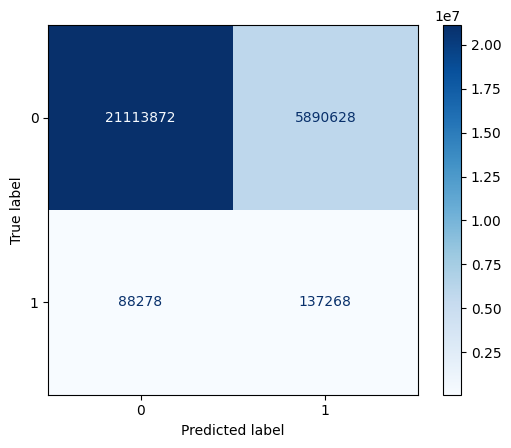

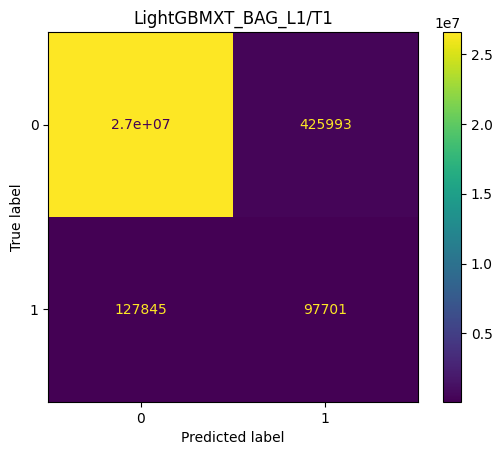

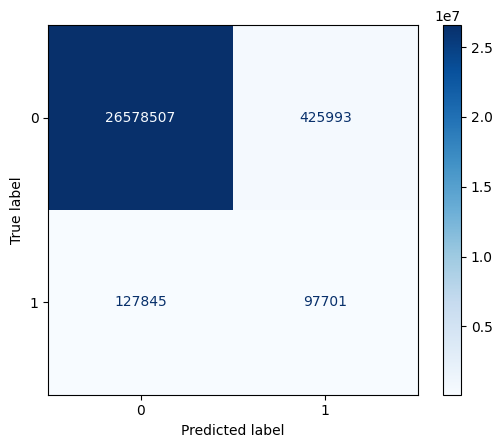

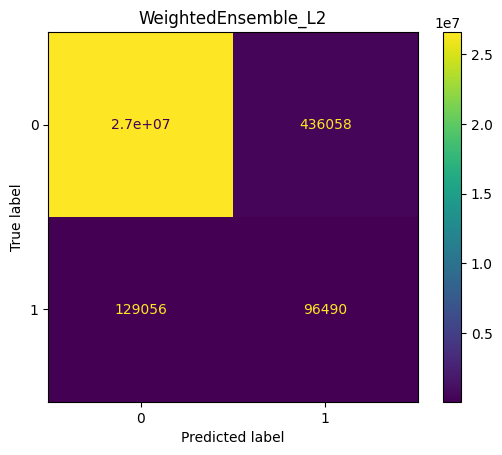

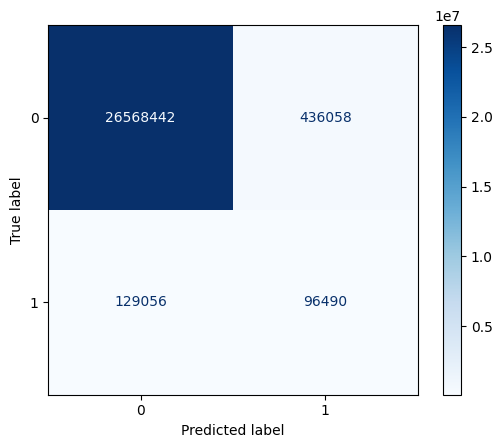

In [13]:
print_confusion_matrices(preds3)

## 1

In [ ]:
# Accuracy, Pred-Time, Fit-Time
leaderboard5 = predictor.leaderboard(df_val, silent=True)
leaderboard5.to_csv("Eval_4_FinalValSummary.csv", sep=",", encoding="utf-8", index=False, header=True)

In [ ]:
y_true5 = df_val["Is Laundering"]
y_pred5 = predictor.predict(df_val, model="NeuralNetFastAI_BAG_L1/040ac038")

In [ ]:
y_pred5_1 = predictor.predict(df_val, model="RandomForestGini_BAG_L1")

In [11]:
# Feature Importance
predictor = TabularPredictor.load(it5["predictor"])

In [13]:
predictor.model_names()

['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1/T1',
 'LightGBMXT_BAG_L1/T2',
 'LightGBMXT_BAG_L1/T3',
 'LightGBMXT_BAG_L1/T4',
 'LightGBMXT_BAG_L1/T5',
 'LightGBM_BAG_L1/T1',
 'LightGBM_BAG_L1/T2',
 'LightGBM_BAG_L1/T3',
 'LightGBM_BAG_L1/T4',
 'LightGBM_BAG_L1/T5',
 'RandomForestGini_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'CatBoost_BAG_L1/T1',
 'ExtraTreesGini_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'NeuralNetFastAI_BAG_L1/191c0a4a',
 'NeuralNetFastAI_BAG_L1/040ac038',
 'XGBoost_BAG_L1/T1',
 'XGBoost_BAG_L1/T2',
 'NeuralNetTorch_BAG_L1/2a606449',
 'NeuralNetTorch_BAG_L1/00ac39e3',
 'NeuralNetTorch_BAG_L1/68c14ba7',
 'LightGBMLarge_BAG_L1',
 'WeightedEnsemble_L2']

In [14]:
predictor.feature_importance(data=df_val, model="NeuralNetFastAI_BAG_L1/040ac038")

,importance,stddev,p_value,n,p99_high,p99_low
Payment Format,0.00100,0.003347,0.270307,5,0.007891,-0.005891
Receiving Currency,0.00024,0.000573,0.200894,5,0.001419,-0.000939
Amount Received,0.00012,0.000179,0.104000,5,0.000488,-0.000248
Account.1,0.00004,0.000385,0.413782,5,0.000832,-0.000752
Amount Paid,0.00004,0.000167,0.310654,5,0.000385,-0.000305
Account,0.00000,0.000000,0.500000,5,0.000000,0.000000
Payment Currency,-0.00008,0.000610,0.608058,5,0.001176,-0.001336
Timestamp,-0.00120,0.004883,0.694068,5,0.008853,-0.011253
From Bank,-0.00292,0.002028,0.983858,5,0.001255,-0.007095
To Bank,-0.00428,0.003097,0.981715,5,0.002097,-0.010657


In [16]:
predictor.feature_importance(data=df_val, model="NeuralNetFastAI_BAG_L1/040ac038", feature_stage="transformed")

,importance,stddev,p_value,n,p99_high,p99_low
Timestamp,0.09644,0.003788,2.849984e-07,5,0.104239,0.088641
Timestamp.day,0.09072,0.002540,7.367226e-08,5,0.095950,0.085490
Payment Format,0.00100,0.003347,2.703068e-01,5,0.007891,-0.005891
Receiving Currency,0.00024,0.000573,2.008938e-01,5,0.001419,-0.000939
Amount Received,0.00012,0.000179,1.040000e-01,5,0.000488,-0.000248
Account.1,0.00004,0.000385,4.137824e-01,5,0.000832,-0.000752
Amount Paid,0.00004,0.000167,3.106541e-01,5,0.000385,-0.000305
Account,0.00000,0.000000,5.000000e-01,5,0.000000,0.000000
Payment Currency,-0.00008,0.000610,6.080578e-01,5,0.001176,-0.001336
From Bank,-0.00292,0.002028,9.838581e-01,5,0.001255,-0.007095


In [18]:
predictor.feature_importance(data=df_val) #No model => chooses best model

,importance,stddev,p_value,n,p99_high,p99_low
Payment Format,0.01176,0.002080,0.000113,5,0.016044,0.007476
Timestamp,0.00368,0.006761,0.145235,5,0.017601,-0.010241
Account.1,0.00016,0.000297,0.147128,5,0.000771,-0.000451
To Bank,-0.00068,0.000576,0.971177,5,0.000506,-0.001866
Amount Received,-0.01328,0.002184,0.999915,5,-0.008782,-0.017778
Amount Paid,-0.01332,0.001724,0.999967,5,-0.009770,-0.016870
Account,-0.01684,0.002017,0.999976,5,-0.012687,-0.020993
From Bank,-0.01916,0.001785,0.999991,5,-0.015484,-0.022836
Receiving Currency,-0.04028,0.005707,0.999953,5,-0.028529,-0.052031
Payment Currency,-0.04212,0.003770,0.999992,5,-0.034358,-0.049882


In [ ]:
predictor.feature_importance(data=df_val, feature_stage="transformed")